# Parameter estimation

This notebook shows how to use the Dottermodel to take the following steps:

1. Load an example geometry (the 'Grote Beek')
2. Visually examine system
3. Run an uncalibrated modelrun and check output
4. Auto-calibrate the roughness coefficient and check output

First, we import the *Dottermodel* class and the *tools* library:

In [1]:
%matplotlib notebook
from dotter.models import DotterModel
from dotter import tools

### Loading and inspecting model

For this example we are going to load an example case study.

In [2]:
deltabeek = DotterModel('../cases/grotebeek/config.ini')

2018-01-14 14:42:09 - utils.py - INFO - Start logging to /home/kdb/Documents/dotter/examples/notebooks/dotter.log
2018-01-14 14:42:09 - models.py - INFO - Loading configuration file ../cases/grotebeek/config.ini
2018-01-14 14:42:09 - models.py - INFO - Loading geometry from ../cases/grotebeek/GroteBeek.xlsx
2018-01-14 14:42:10 - containers.py - DEBUG - number of timesteps: 182
2018-01-14 14:42:10 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-01-14 14:42:10 - containers.py - DEBUG - top time: 2016-12-30 00:00:00
2018-01-14 14:42:10 - containers.py - DEBUG - using spatial step of 40.0 m
2018-01-14 14:42:10 - models.py - INFO - Loading boundary conditions
2018-01-14 14:42:10 - containers.py - DEBUG - Lateral of factor: 1.06 input at x: 150
2018-01-14 14:42:10 - containers.py - DEBUG - Lateral of factor: 1.2 input at x: 910
2018-01-14 14:42:10 - containers.py - DEBUG - Lateral of factor: 1.43 input at x: 1590
2018-01-14 14:42:10 - models.py - INFO - Planting vegetation
201

This example already contains measurements. Let's see what the model looks like:

<IPython.core.display.Javascript object>


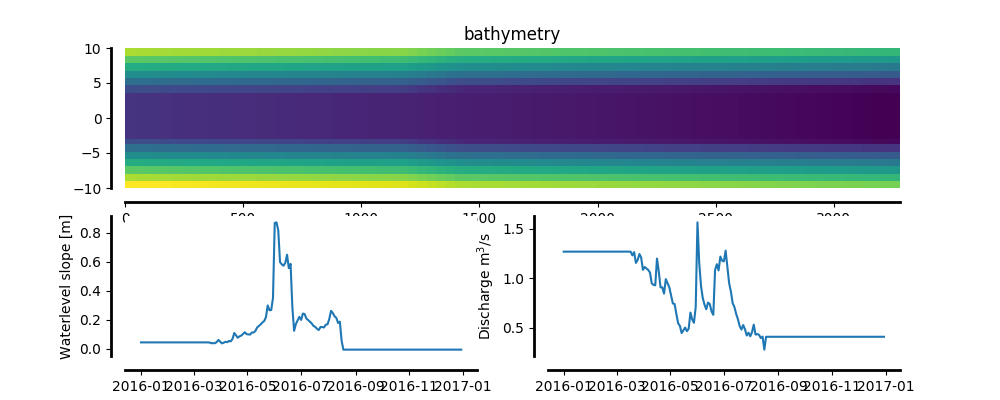

In [3]:
deltabeek.dash(show=True)

Run the model

2018-01-14 14:42:14 - models.py - INFO - start model run
100%|██████████| 183/183 [00:01<00:00, 103.41it/s]


<IPython.core.display.Javascript object>


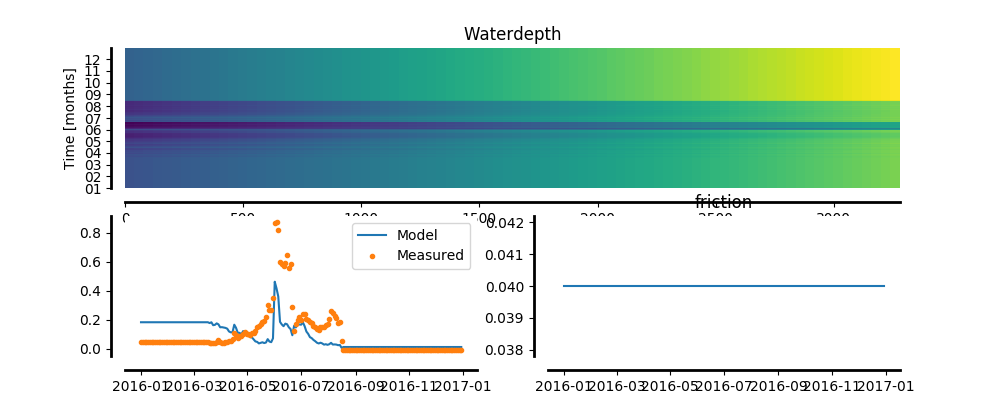

In [4]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We see that model and measurement do not really compare well. To fix that, we can calibrate the model. To do this, we are going to use the tools library:

In [5]:
tools.estimate_roughness(deltabeek, every=5)

2018-01-14 14:42:18 - tools.py - INFO - Optimising model-wide roughness factor
100%|██████████| 183/183 [00:10<00:00, 17.29it/s]


The model already set friciton

2018-01-14 14:42:33 - models.py - INFO - start model run
100%|██████████| 183/183 [00:01<00:00, 101.59it/s]


<IPython.core.display.Javascript object>


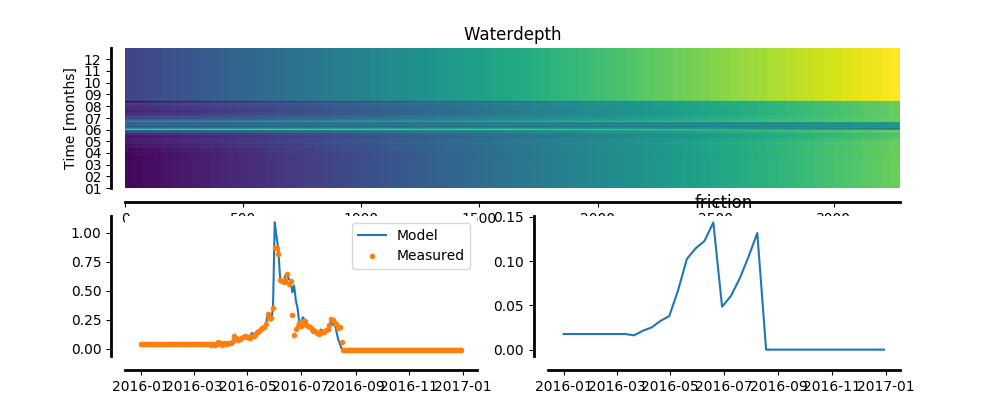

In [6]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We have calibrated the model on measurements. Can we learn more from the roughness values? We can compare to litarature blockage

<IPython.core.display.Javascript object>


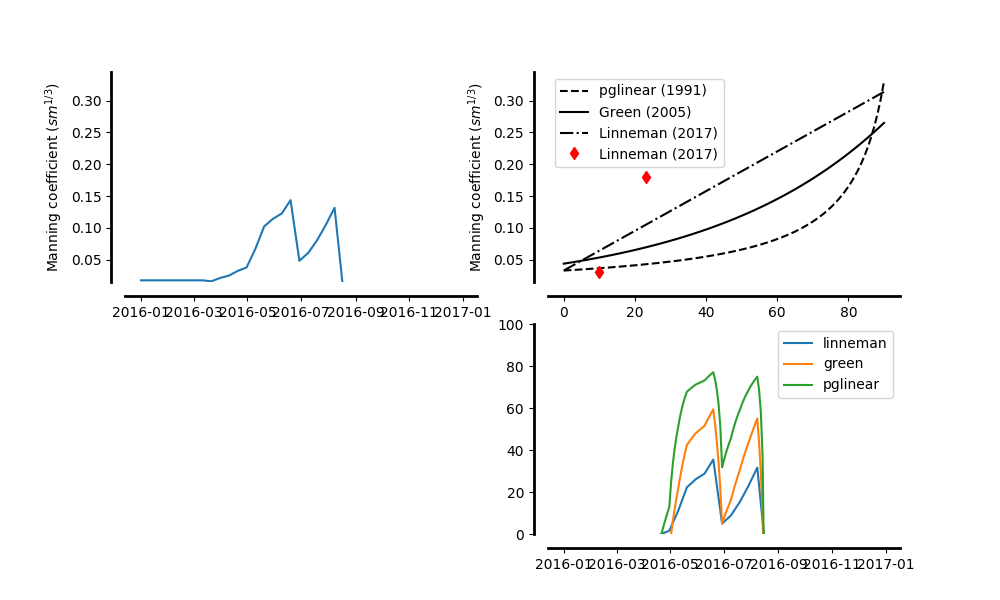

/home/kdb/Documents/dotter/dotter/tools.py:185: RuntimeWarning: divide by zero encountered in log
  return np.log(data / 0.0438) / 2.
/home/kdb/Documents/dotter/dotter/tools.py:191: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - 0.033 / data


In [7]:
tools.blockage_analysis(deltabeek)